In [1]:
# Packages for convolutions
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models

from tensorflow.keras.datasets import mnist
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


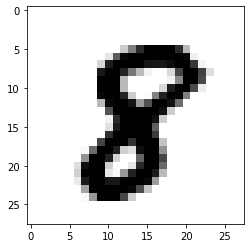

In [2]:
# Display random sample from our dataset
sample = trainX[np.random.randint(10000)]

plt.imshow(sample, cmap = 'gray_r')
plt.show()

### Pooling
Independent usage of **pooling** technique.

(1, 14, 14, 1)


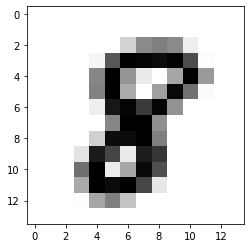

In [4]:
model_pool = models.Sequential()
model_pool.add(layers.Input(shape = (28, 28, 1)))
# Alternative for MaxPool
# model_pool.add(layers.AveragePooling2D(2))
model_pool.add(layers.MaxPool2D(2))

sample_reshaped = np.reshape(sample, (1, 28, 28, 1))

pooled_digit = model_pool(sample_reshaped)
print(pooled_digit.shape)
plt.imshow(pooled_digit[0,:,:,0], cmap = 'gray_r')

### Activation function

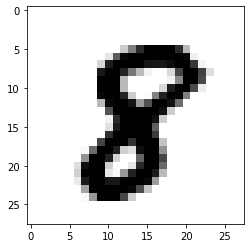

In [5]:
model_relu = models.Sequential()
model_relu.add(layers.Input(shape = (28, 28, 1)))

# model_relu.add(layers.MaxPool2D(2))
model_relu.add(layers.Activation(tf.keras.activations.relu))

out = model_relu(sample_reshaped)
plt.imshow(out[0,:,:,0], cmap = 'gray_r')

## All together


### Digit convolution example

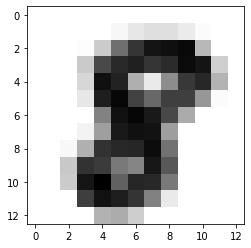

In [13]:
# Building our model for convolute
model_bw = models.Sequential()
model_bw.add(layers.Conv2D(1, 3, activation='relu', input_shape=(28, 28, 1)))

# Adding another layer at the output
#model_bw.add(layers.Conv2D(5, 3, activation='relu', input_shape=(28, 28, 1)))
#model_bw.add(layers.Conv2D(1, 3, activation='sigmoid'))
model_bw.add(layers.MaxPool2D(2))


# Apply the convolution to the sample
conv = model_bw(np.reshape(sample, (1, 28, 28, 1)))

# Visualize results
plt.imshow(conv[0,:,:,0], cmap = 'gray_r')